## This is a simple demonstration of what SPIRALtap can do

In [77]:
# Importations
%matplotlib inline
import pySPIRALTAP
import numpy as np
import matplotlib.pyplot as plt
import scipy.io # to import.mat files

### **Demo 1:** reconstruction of a 1D sparse signal
**Description:**  One dimensional compressed sensing example penalizing the sparsity (l1 norm) of the coefficients in the canonical basis.  Here:
- the true signal f is of length 100,000 with 1,500 nonzero entries yielding a *sparsity of 1.5%*.  
- We take 40,000 compressive measurements in y. 
- The average number of photons per measurement is 15.03, with a maximum of 145.

We run SPIRAL until the relative change in the iterates falls below a tolerance of 1x10^-8, up to a maximum of 100 iterations (however only 37 iterations are required to satisfy the stopping criterion).  

Output:  This demonstration automatically displays the following:
- *Figure 1*:   Simulation setup (true signal, true detector intensity, observed counts),
- *Figure 2*:   Reconstructed signal overlayed ontop of true signal,
- *Figure 3*:   RMSE error evolution versus iteration and compute time, and
- *Figure 4*:   Objective evolution versus iteration and compute time.

In [78]:
# ==== Load example data: 
# f = True signal
# A = Sensing matrix
# y ~ Poisson(Af)
rf=scipy.io.loadmat('./demodata/canonicaldata.mat')
f,y,Aorig = (rf['f'], rf['y'], rf['A']) # A Stored as a sparse matrix

## Setup function handles for computing A and A^T:
AT = lambda x: Aorig.transpose().dot(x)
A = lambda x: Aorig.dot(x)

In [80]:
# ==== Set regularization parameters and iteration limit:
tau   = 1e-6
maxiter = 100
tolerance = 1e-8
verbose = 10

# ==== Simple initialization:  
# AT(y) rescaled to a least-squares fit to the mean intensity
finit = y.sum()*AT(y).size/AT(y).sum()/AT(np.ones_like(y)).sum() * AT(y)

In [82]:
# ==== Run the algorithm:
## Demonstrating all the options for our algorithm:
resSPIRAL = pySPIRALTAP.SPIRALTAP(y,A,tau,
                                  AT=AT,
                                  maxiter=maxiter,
                                  miniter=5,
                                  stopcriterion=3,
                                  tolerance=tolerance,
                                  alphainit=1,
                                  alphamin=1e-30,
                                  alphamax=1e30,
                                  alphaaccept=1e30,
                                  logepsilon=1e-10,
                                  saveobjective=True,
                                  savereconerror=True,
                                  savesolutionpath=False,
                                  truth=f,
                                  verbose=verbose, savecputime=True)
## Deparse outputs
fhatSPIRAL = resSPIRAL[0]
parSPIRAL = resSPIRAL[1]
iterationsSPIRAL = parSPIRAL['iterations']
objectiveSPIRAL = parSPIRAL['objective']
reconerrorSPIRAL = parSPIRAL['reconerror']
cputimeSPIRAL = parSPIRAL['cputime']

ERROR: this part of the code is not implemented yet



= Beginning SPIRAL Reconstruction    @ 2016-04-27 14:31:30.725170 =
=   Noisetype: Poisson               Penalty: Canonical           =
=   Tau:       1e-06                 Maxiter: 100                 =

Iter: 10, ||dx||%%: 49.8128424244, Alph: 0.000909416578556, Alph Acc: 0.000454708289278, Time: 0.717298984528, Obj: 840286.408656, dObj%%: 32.7986485597, Err: 0.999464486128
Iter: 20, ||dx||%%: 61.2908230373, Alph: 2.75005983447e-09, Alph Acc: 1.37502991724e-09, Time: 1.08930206299, Obj: -1407113.13329, dObj%%: 10.3633043219, Err: 0.674209265346
Iter: 30, ||dx||%%: 0.278791663783, Alph: 4.95339396055e-10, Alph Acc: 2.47669698027e-10, Time: 1.45905995369, Obj: -1552159.70354, dObj%%: 0.000171260819481, Err: 0.0599229555016
Iter: 40, ||dx||%%: 0.000180722494396, Alph: 1.1819209593e-09, Alph Acc: 5.90960479652e-10, Time: 1.86760401726, Obj: -1552159.94129, dObj%%: 1.8800457165e-08, Err: 0.0598906984243

= Completed SPIRAL Reconstruction    @ 2016-04-27 14:31:32.826486 =
=   Noisetype: P

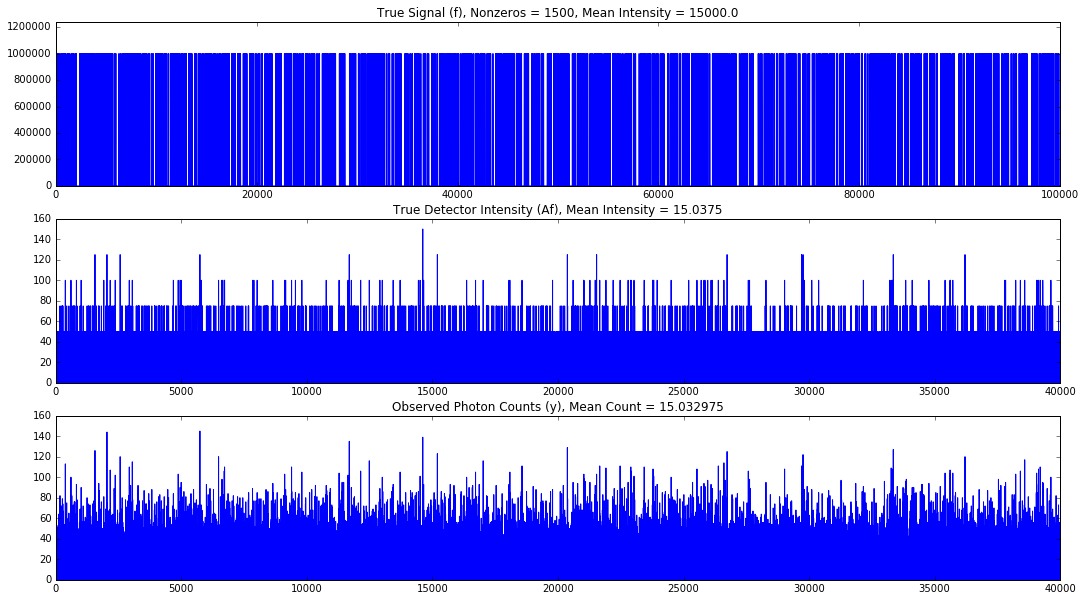

In [86]:
## ==== Display Results:
## Problem Data:
plt.figure(1, figsize=(18,10))
plt.subplot(311)
plt.plot(f)
plt.title('True Signal (f), Nonzeros = {}, Mean Intensity = {}'.format((f!=0).sum(), f.mean()))
plt.ylim((0, 1.24*f.max()))

plt.subplot(312)
plt.plot(A(f))
plt.title('True Detector Intensity (Af), Mean Intensity = {}'.format(A(f).mean()))

plt.subplot(313)
plt.plot(y)
plt.title('Observed Photon Counts (y), Mean Count = {}'.format(y.mean()))

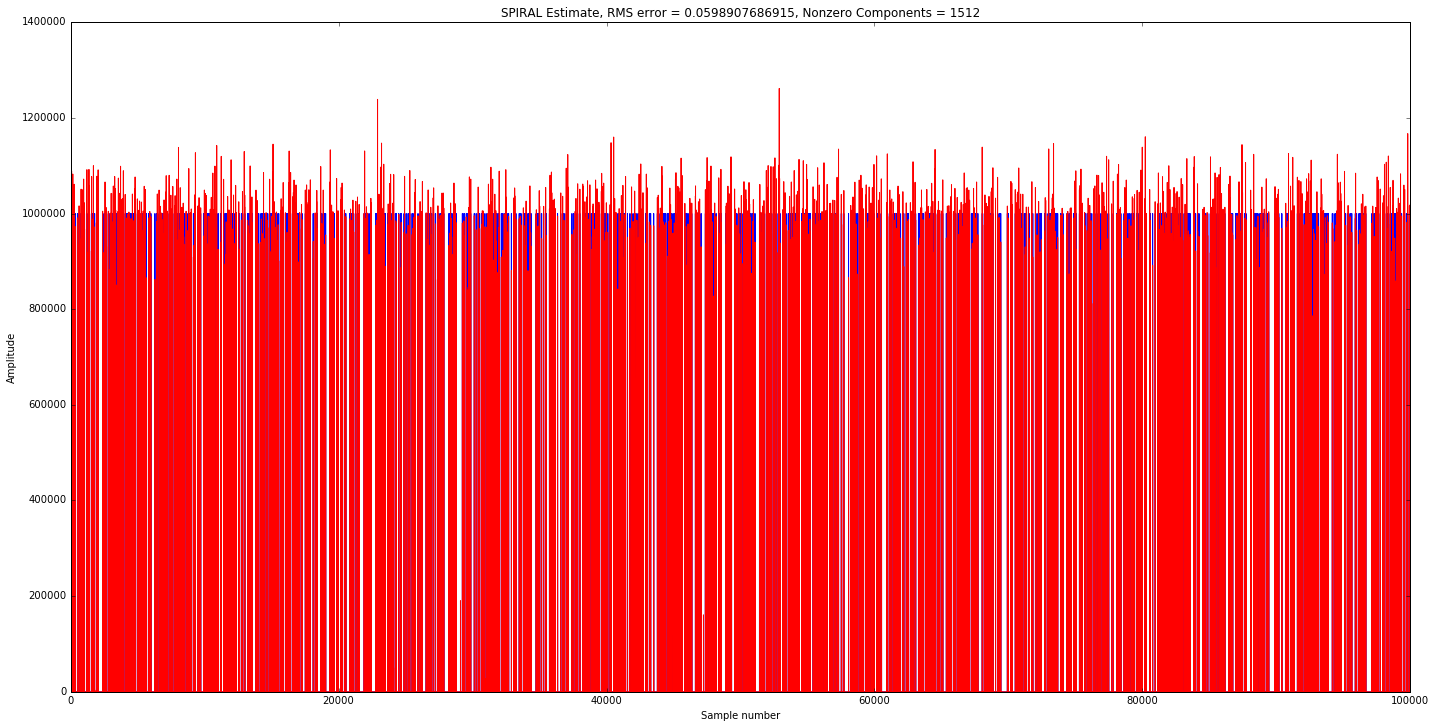

In [92]:
## Reconstructed Signals:
plt.figure(2, figsize=(24,12))
plt.plot(f, color='blue')
plt.plot(fhatSPIRAL, color='red')
plt.xlabel('Sample number')
plt.ylabel('Amplitude')
plt.title('SPIRAL Estimate, RMS error = {}, Nonzero Components = {}'.format(np.linalg.norm(f-fhatSPIRAL)/np.linalg.norm(f), (fhatSPIRAL!=0).sum()))

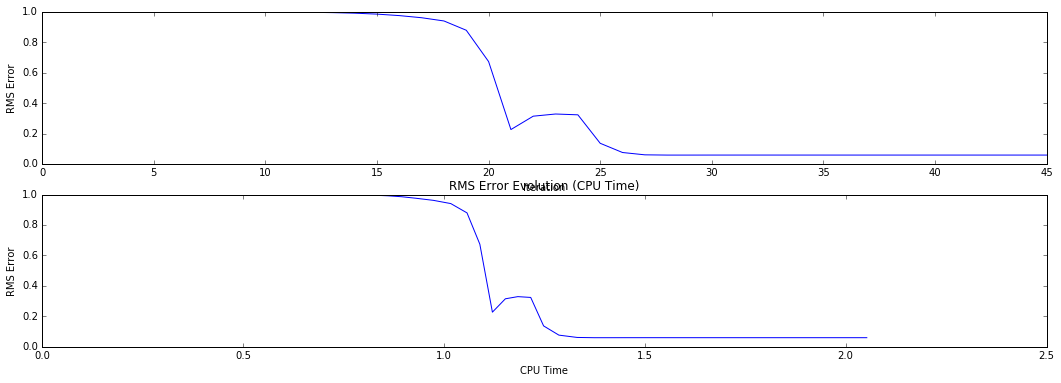

In [96]:
## RMS Error:
plt.figure(3, figsize=(18,6))
plt.subplot(211)
plt.plot(range(iterationsSPIRAL), reconerrorSPIRAL, color='blue')
plt.xlabel('Iteration')
plt.ylabel('RMS Error')

plt.subplot(212)
plt.plot(cputimeSPIRAL, reconerrorSPIRAL, color='blue')
plt.xlabel('CPU Time')
plt.ylabel('RMS Error')
plt.title('RMS Error Evolution (CPU Time)')

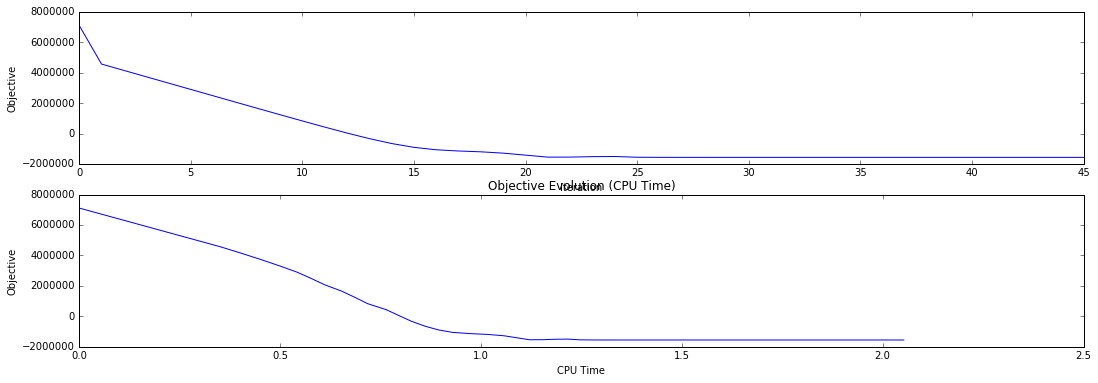

In [98]:
## Objective:
plt.figure(4, figsize=(18,6))
plt.subplot(211)
plt.plot(range(iterationsSPIRAL), objectiveSPIRAL)
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.subplot(212)
plt.plot(cputimeSPIRAL, objectiveSPIRAL)
plt.xlabel('CPU Time')
plt.ylabel('Objective')
plt.title('Objective Evolution (CPU Time)')